## Time series data 


> Time series data được hiểu một cách đơn giản là một tập dữ liệu được lấy theo chu kì thời gian nhất định.Ví dụ lấy theo phút, giờ , ngày hay tháng năm .

<h3> import thư viện </h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter
from sklearn.model_selection import train_test_split

<h3> Đọc data </h3> 

In [11]:
path = "data"
item_categories = pd.read_csv(path+'/item_categories.csv')
items = pd.read_csv(path+'/items.csv')
sample_submission = pd.read_csv(path+'/sample_submission.csv')
sample_submission1 = pd.read_csv(path+'/sample_submission1.csv')
shops = pd.read_csv(path+'/shops.csv')
test = pd.read_csv(path+'/test.csv')
test1 = pd.read_csv(path+'/test1.csv')
train = pd.read_csv(path+'/train.csv')
sales_train = pd.read_csv(path+'/sales_train.csv')

In [12]:
print('item_categories')
print(item_categories.head())

print('items')
print(items.head())

print('sample_submission')
print(sample_submission.head())

print('sample_submission1')
print(sample_submission1.head())

print('shops')
print(shops.head())

print('test')
print(test.head())

print('test1')
print(test1.head())

print('train')
print(train.head())

print('sales_train')
print(sales_train.head())

item_categories
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
items
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
sample_submission
   ID  item_cnt_month
0   0             0.5
1   1             0.5
2   2             0.5
3   3             0.5
4   4             0.5
sample_submission1
   id  sales
0  

<h4> data sử dụng dự đoán số mặt hàng được bán </h4>
<p> info data </p>

In [13]:
# gộp tập item_categories và item 
item=pd.merge(item_categories,items, how='inner')
item

,item_category_name,item_category_id,item_name,item_id
0,PC - Гарнитуры/Наушники,0,PC: Гарнитура HyperX Cloud Core игровая стерео...,5441
1,PC - Гарнитуры/Наушники,0,Наушники PHILIPS SBC HC8680,16255
2,PC - Гарнитуры/Наушники,0,Наушники RITMIX RH-120,16256
3,PC - Гарнитуры/Наушники,0,Наушники RITMIX RH-124 Black,16257
4,Аксессуары - PS2,1,PS2: Карта памяти 8 Мб черная (Memory Card 8Mb...,5606
...,...,...,...,...
22165,Элементы питания,83,Элемент питания GP 15AU (LR6) - Блистер 2 шт U...,22095
22166,Элементы питания,83,Элемент питания GP 24A (LR03) - Блистер 2 шт,22096
22167,Элементы питания,83,Элемент питания GP 24AU (LR03) - Блистер 2 шт ...,22097
22168,Элементы питания,83,Элемент питания КОСМОС LR03 2*BL,22098


In [14]:
# gộp tập sales_train và shop
sales_train_shop=pd.merge(sales_train,shops,on='shop_id')
sales_train_shop

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name
0,02.01.2013,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир"""
1,10.01.2013,0,59,22151,399.0,1.0,"Ярославль ТЦ ""Альтаир"""
2,04.01.2013,0,59,5603,699.0,1.0,"Ярославль ТЦ ""Альтаир"""
3,19.01.2013,0,59,5587,199.0,2.0,"Ярославль ТЦ ""Альтаир"""
4,31.01.2013,0,59,5613,5571.0,1.0,"Ярославль ТЦ ""Альтаир"""
...,...,...,...,...,...,...,...
2935844,30.10.2015,33,36,20231,169.0,1.0,"Новосибирск ТРЦ ""Галерея Новосибирск"""
2935845,18.10.2015,33,36,20334,1949.0,1.0,"Новосибирск ТРЦ ""Галерея Новосибирск"""
2935846,31.10.2015,33,36,20339,1549.0,1.0,"Новосибирск ТРЦ ""Галерея Новосибирск"""
2935847,31.10.2015,33,36,20352,1549.0,1.0,"Новосибирск ТРЦ ""Галерея Новосибирск"""


In [15]:
# gộp tổng hai tập mới item và sales_train_merged
df = pd.merge(sales_train_shop,item,on='item_id')
# xem thông tin 5 dòng đầu 
df.head().style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'})

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_category_name,item_category_id,item_name
0,02.01.2013,0,59,22154,999.000000,1.000000,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
1,02.01.2013,0,25,22154,999.000000,1.000000,"Москва ТРК ""Атриум""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
2,03.01.2013,0,25,22154,999.000000,1.000000,"Москва ТРК ""Атриум""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
3,20.01.2013,0,25,22154,999.000000,1.000000,"Москва ТРК ""Атриум""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
4,23.01.2013,0,25,22154,999.000000,1.000000,"Москва ТРК ""Атриум""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)


In [16]:
# thông tin của data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   shop_name           object 
 7   item_category_name  object 
 8   item_category_id    int64  
 9   item_name           object 
dtypes: float64(2), int64(4), object(4)
memory usage: 246.4+ MB


In [17]:
# giá trị của data
df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,4.000138e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01


In [18]:
# xem các giá trị null
df.isnull().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
shop_name             0
item_category_name    0
item_category_id      0
item_name             0
dtype: int64

<h3> Chuyen cot date (obj) thanh datetime </h3>

In [19]:
# chuyển date( object ) thành date( datetime )
# phân tích cú pháp ngày với ngày đầu tiên, ví dụ: "10/11/12" được phân tích cú pháp là 2012-11-10
df.date = pd.to_datetime(df.date, dayfirst=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int64         
 2   shop_id             int64         
 3   item_id             int64         
 4   item_price          float64       
 5   item_cnt_day        float64       
 6   shop_name           object        
 7   item_category_name  object        
 8   item_category_id    int64         
 9   item_name           object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 246.4+ MB
None


In [20]:
# thêm cột năm từ côt date
df['year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
# thêm cột tháng  từ côt date
df['month'] = pd.to_datetime(df['date']).dt.strftime('%m')
# thêm cột này từ cột date
df['day'] = pd.to_datetime(df['date']).dt.strftime('%d')
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_category_name,item_category_id,item_name,year,month,day
0,2013-01-02,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD),2013,01,02
1,2013-01-02,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD),2013,01,02
2,2013-01-03,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD),2013,01,03
3,2013-01-20,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD),2013,01,20
4,2013-01-23,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD),2013,01,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-03,33,20,21047,1899.0,1.0,"Москва ""Распродажа""",Подарки - Атрибутика,61,Футболка Borderlands Jack Hero XL,2015,10,03
2935845,2015-10-01,33,20,21012,1899.0,1.0,"Москва ""Распродажа""",Подарки - Атрибутика,61,Футболка Assassin's Creed Syndicate Rook S,2015,10,01
2935846,2015-10-03,33,20,20451,1699.0,1.0,"Москва ""Распродажа""",Подарки - Фигурки,72,"Фигурка DC Classic 8"" Wonder Women Head Knocker",2015,10,03
2935847,2015-10-04,33,20,20453,5399.0,1.0,"Москва ""Распродажа""",Подарки - Фигурки,72,Фигурка DC Universe Online Solomon Grundy Stat...,2015,10,04


<h3> Tiền xử lý và trực quan hóa data </h3>

In [21]:
# thống kê mô tả tập dữ liệu 
df.describe().style.background_gradient()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2935849.000000,2935849.000000,2935849.000000,2935849.000000,2935849.000000,2935849.000000
mean,14.569911,33.001728,10197.227057,890.853233,1.242641,40.001383
std,9.422988,16.226973,6324.297354,1729.799631,2.618834,17.100759
min,0.000000,0.000000,0.000000,-1.000000,-22.000000,0.000000
25%,7.000000,22.000000,4476.000000,249.000000,1.000000,28.000000
50%,14.000000,31.000000,9343.000000,399.000000,1.000000,40.000000
75%,23.000000,47.000000,15684.000000,999.000000,1.000000,55.000000
max,33.000000,59.000000,22169.000000,307980.000000,2169.000000,83.000000


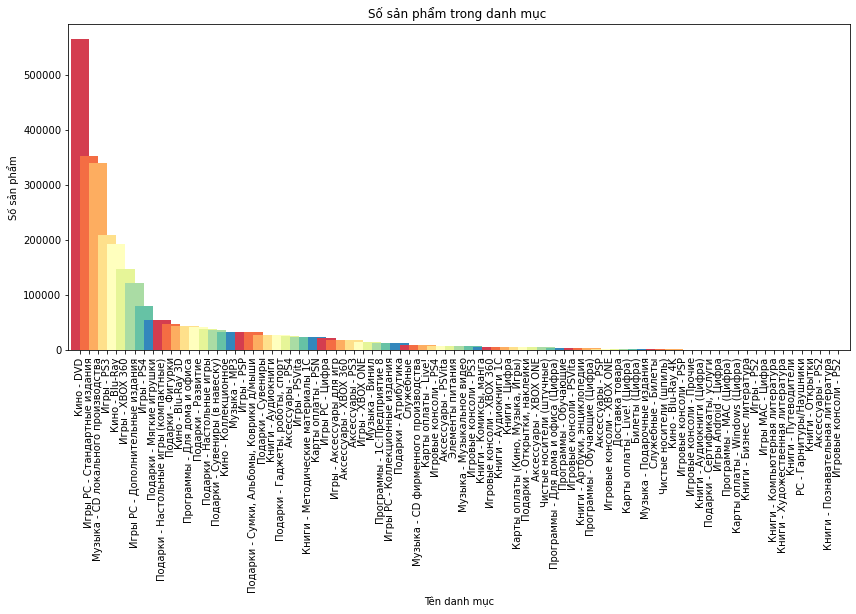

In [22]:
#số lượng mặt hàng trong danh mục 
# biến result nhận giá trị cột item_category_name
result=df['item_category_name'].value_counts().sort_values(ascending=False)[0:]
# vẽ biểu đồ plot thanh dọc 'bar',kích thước ,độ dày cột và màu 
result.plot(kind='bar',figsize=(14,6),width =2 ,color=sns.color_palette("Spectral", 9))
# xét tên tiêu đề ,tên trục y,x
plt.title("Số sản phẩm trong danh mục ")
plt.ylabel('Số sản phẩm')
plt.xlabel('Tên danh mục')
plt.show()

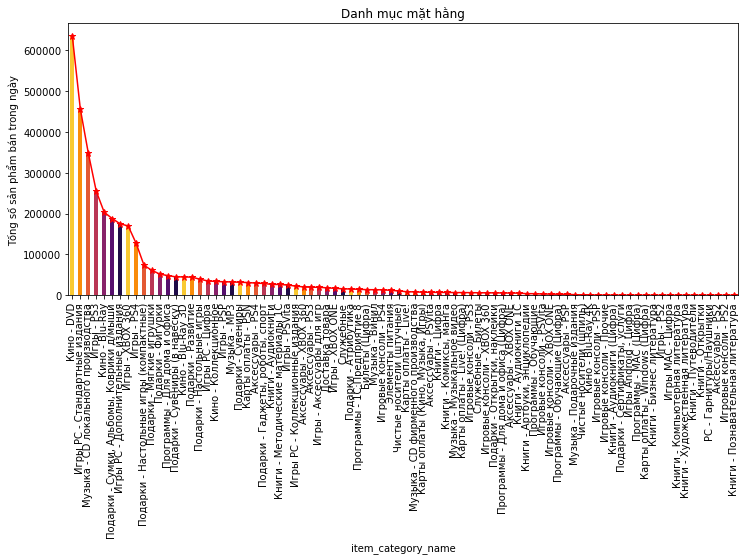

In [23]:
# số sản phẩm đã bán trong mỗi danh mục mặt hàng
plt.figure(figsize=(12,5))
plt.title('Danh mục mặt hằng')
plt.ylabel('Tống số sản phẩm bán trong ngày')
# giá trị giao nhau=*,ms là độ dày giá trị giao nhau.
df.groupby('item_category_name')['item_cnt_day'].sum().sort_values(ascending=False)[0:].plot(kind='line', marker='*', color='red', ms=7)
df.groupby('item_category_name')['item_cnt_day'].sum().sort_values(ascending=False)[0:].plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

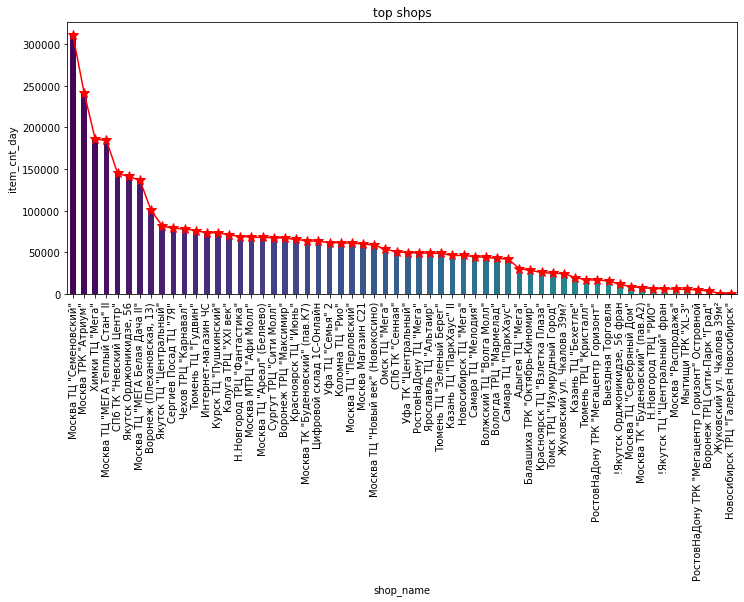

In [24]:
# số sản phẩm đã bán ở mỗi của 60 hàng
plt.figure(figsize=(12,5))
plt.title('top shops')
plt.ylabel('item_cnt_day')
sales_train_shop.groupby('shop_name')['item_cnt_day'].sum().sort_values(ascending=False)[0:].plot(kind='line', marker='*', color='red', ms=10)
sales_train_shop.groupby('shop_name')['item_cnt_day'].sum().sort_values(ascending=False)[0:].plot(kind='bar',color=sns.color_palette("viridis", 100))
plt.show()

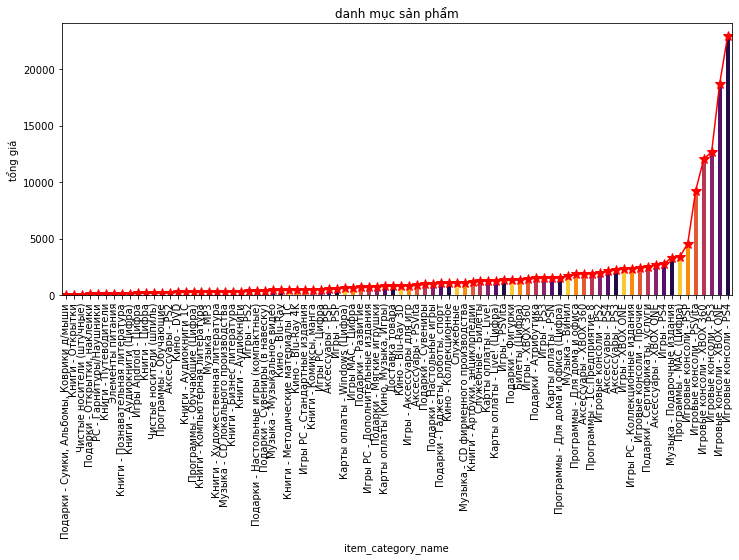

In [25]:
# giá của các mặt hàng 
plt.figure(figsize=(12,5))
plt.title('danh mục sản phẩm')
plt.ylabel('tổng giá')
# sắp xếp dữ liệu, nhóm danh mục và giá theo trung bình
df.groupby('item_category_name')['item_price'].mean().sort_values(ascending=True)[0:].plot(kind='line', marker='*', color='red', ms=10)
df.groupby('item_category_name')['item_price'].mean().sort_values(ascending=True)[0:].plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

<h2> Phan tich chuoi thoi gian </h2>

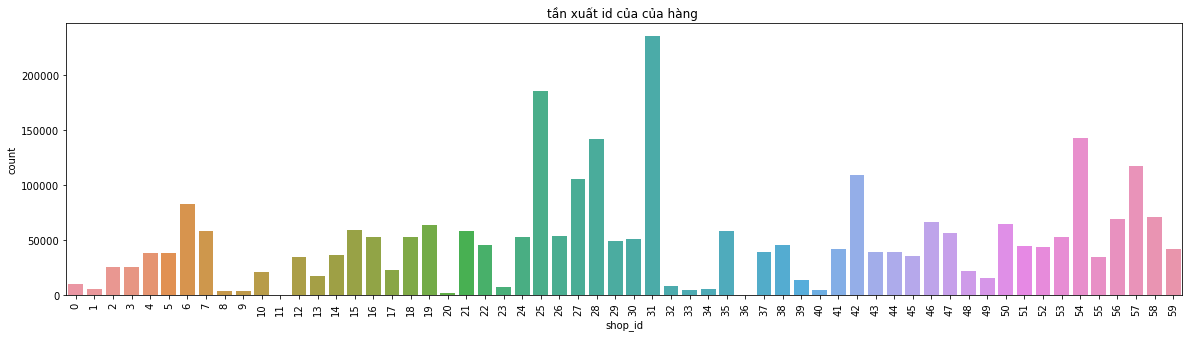

In [26]:
# số của hàng có lượng trao đổi mặt hàng 
plt.figure(figsize=(20,5))
#biểu đồ cột với x là shop và y là toongt số của hàng 
ax=sns.countplot(data=df, x='shop_id')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("tần xuất id của của hàng ")
plt.show()

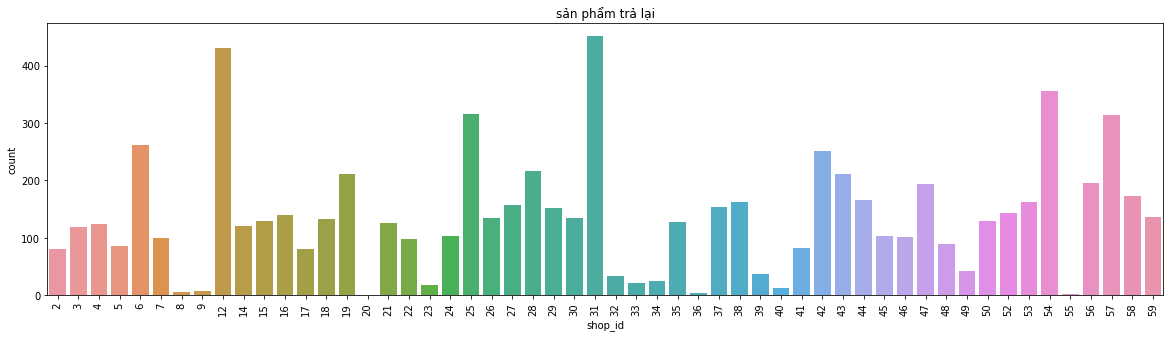

In [27]:
#số sản phẩm bị trả lại 
plt.figure(figsize=(20,5))
# shop và số sản phầm rả về 
ax=sns.countplot(data=df[df['item_cnt_day']<0], x='shop_id')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("sản phẩm trả lại")
plt.show()

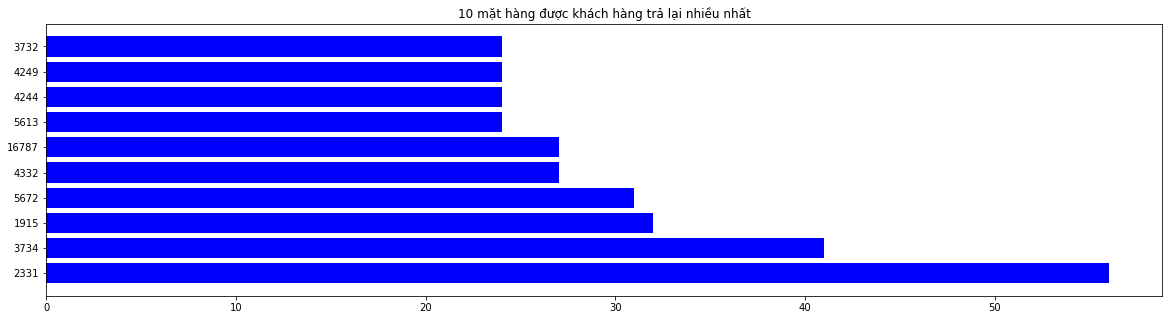

In [28]:
# sản phẩm được trả về nhiều nhất
# biến counter nhận giá trị số sản phẩm trả về
counter = pd.DataFrame(Counter(df[df['item_cnt_day']<0]['item_id']).most_common(10))
# lấy hai cột item_id và cột Counts
counter.columns=['item_id', 'Counts']
# ép cột item_id thành kiểu str
counter['item_id']=counter['item_id'].astype('str')
plt.figure(figsize=(20,5))
plt.barh(data=counter, y='item_id', width='Counts', color='blue')
plt.title("10 mặt hàng được khách hàng trả lại nhiều nhất")
plt.show()

In [29]:
# lọc sản phẩm theo id.
locid = df.loc[df['item_id']== 2331]
#locid.describe().style.background_gradient()
locid.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_category_name,item_category_id,item_name,year,month,day
1573112,2013-11-23,10,59,2331,2799.0,1.0,"Ярославль ТЦ ""Альтаир""",Игры - PS4,20,"Call of Duty: Ghosts [PS4, русская версия]",2013,11,23
1573113,2013-11-29,10,59,2331,2799.0,3.0,"Ярославль ТЦ ""Альтаир""",Игры - PS4,20,"Call of Duty: Ghosts [PS4, русская версия]",2013,11,29
1573114,2013-11-28,10,59,2331,2799.0,1.0,"Ярославль ТЦ ""Альтаир""",Игры - PS4,20,"Call of Duty: Ghosts [PS4, русская версия]",2013,11,28
1573115,2013-12-30,11,59,2331,2799.0,1.0,"Ярославль ТЦ ""Альтаир""",Игры - PS4,20,"Call of Duty: Ghosts [PS4, русская версия]",2013,12,30
1573116,2013-12-24,11,59,2331,2799.0,1.0,"Ярославль ТЦ ""Альтаир""",Игры - PS4,20,"Call of Duty: Ghosts [PS4, русская версия]",2013,12,24


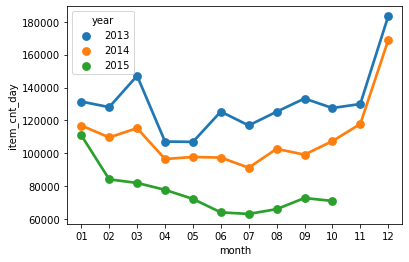

In [30]:
# biểu đồ tỉ lệ số lượng sản phẩm đã bán và tháng
#Đặt lại chỉ mục, nhóm năm tháng theo tổng số sản phẩm bán ra 
grouped = pd.DataFrame(df.groupby(['year','month'])['item_cnt_day'].sum().reset_index())
sns.pointplot(x='month', y='item_cnt_day', hue='year', data=grouped);

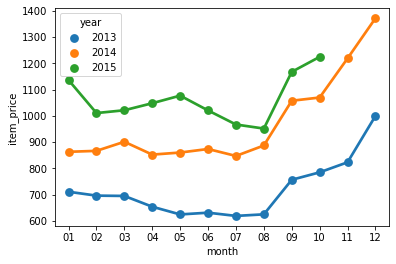

In [31]:
# biểu đồ tỉ lệ giá bán và tháng
grouped_price = pd.DataFrame(df.groupby(['year','month'])['item_price'].mean().reset_index())
sns.pointplot(x='month', y='item_price', hue='year', data=grouped_price);

In [32]:
#coppy tập data df1 từ df
df1 =df
# Xét index bằng date cho tập df1
df1=df1.set_index('date')

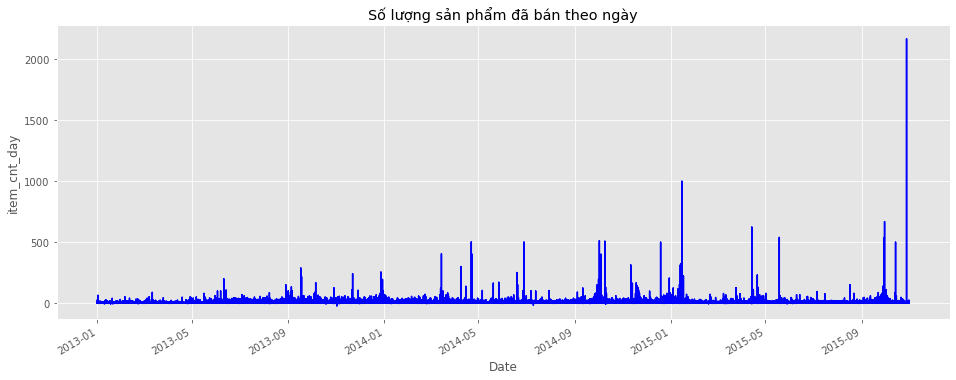

In [33]:
# sử dụng biểu đồ ggplot
plt.style.use('ggplot')
ax2 = df1['item_cnt_day'].plot(figsize=(16,6),color='blue')
# đặt tên title 
ax2.set_title('Số lượng sản phẩm đã bán theo ngày');
# sét trục x đặt tên là date
ax2.set_xlabel('Date')
# xét trục y là item_cnt_day
ax2.set_ylabel('item_cnt_day')
plt.show()

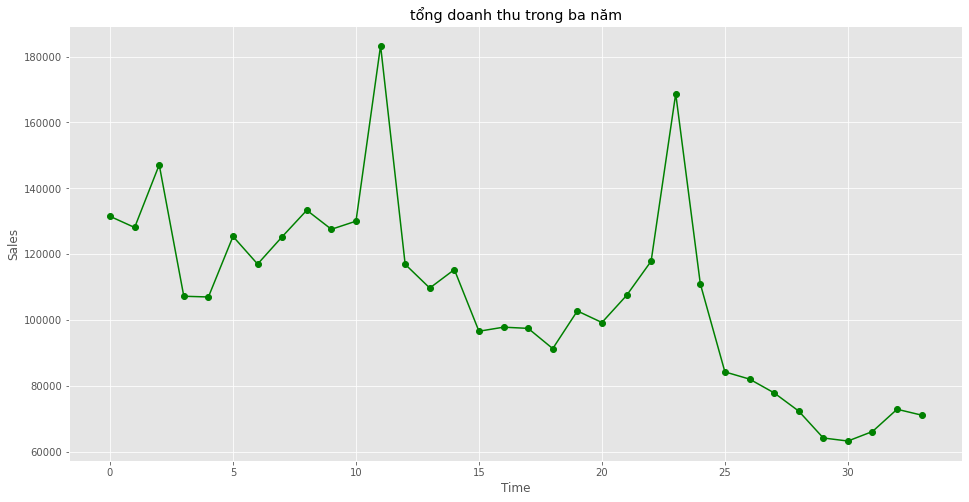

In [34]:
# biểu đồ tổng doanh thu trong ba năm
ts=df1.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('tổng doanh thu trong ba năm')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid(True)
plt.plot(ts,'go-')
plt.show()

<h3> xử lý data </h3>

<h3>có những cách giải quết data</h3> 
<p> Giải quết missing data </p>
<P> * Xóa dữu liệu missing (df.dropnan())</p>
<P> * Thay thế giá trị bằng giá trị liền trước , liền sau , trung bình hoặc trun vị. </p>
<p> sử lý ngoại lai </p>
<P> Sử lý trùng lặp </p>

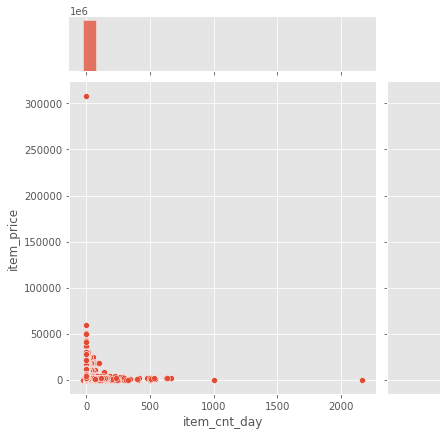

In [35]:
#sns.jointplot(x="item_cnt_day", y="item_price", data=df, height=8)
sns.jointplot(data=df, x="item_cnt_day", y="item_price")
plt.show()

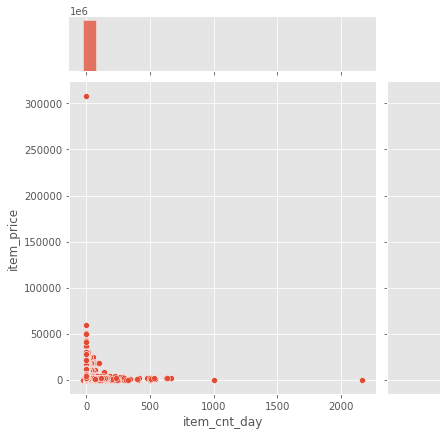

In [36]:
#sns.jointplot(x="item_cnt_day", y="item_price", data=df, height=8)
sns.jointplot(data=df, x="item_cnt_day", y="item_price")
plt.show()

In [37]:
#loại bỏ giá trị trùng lặp
print('Tệp dữ liệu trước khi lọc :', df.shape)
df = df[df['shop_id'].isin(df['shop_id'].unique())]

df = df[df['item_id'].isin(df['item_id'].unique())]
print('Tệp dữ liệu sau khi lọc:', df.shape)

Tệp dữ liệu trước khi lọc : (2935849, 13)
Tệp dữ liệu sau khi lọc: (2935849, 13)


In [38]:
print('trước khi loại bỏ out line:', df.shape)
# lấy giá trị số sản phẩm bán và giá nhỏ hơn 75000
df = df.query('item_cnt_day >= 0 and item_cnt_day <= 125 and item_price < 75000')
print('sau khi loại bỏ out line:', df.shape)

trước khi loại bỏ out line: (2935849, 13)
sau khi loại bỏ out line: (2928400, 13)


In [39]:
# sau khi su lu outline

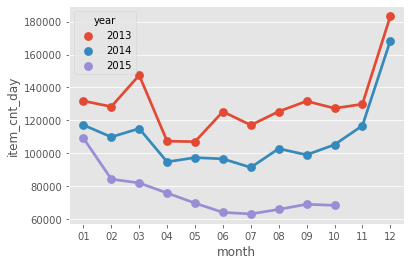

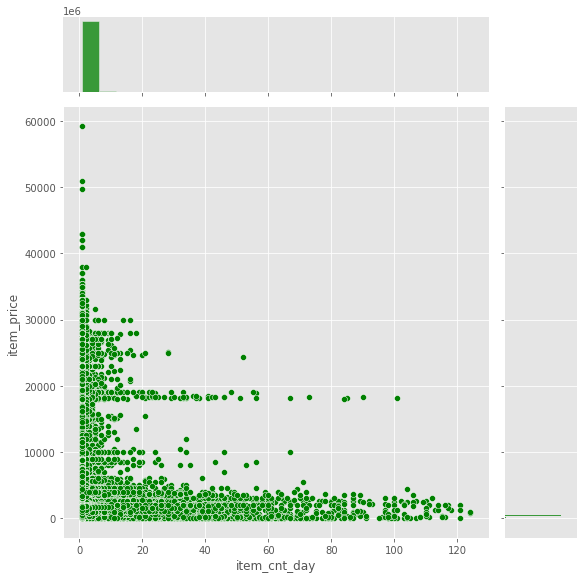

In [40]:
cleaned = pd.DataFrame(df.groupby(['year','month'])['item_cnt_day'].sum().reset_index())
sns.pointplot(x='month', y='item_cnt_day', hue='year', data=cleaned);

sns.jointplot(x="item_cnt_day", y="item_price", data=df, height=8, color='green')
plt.show();

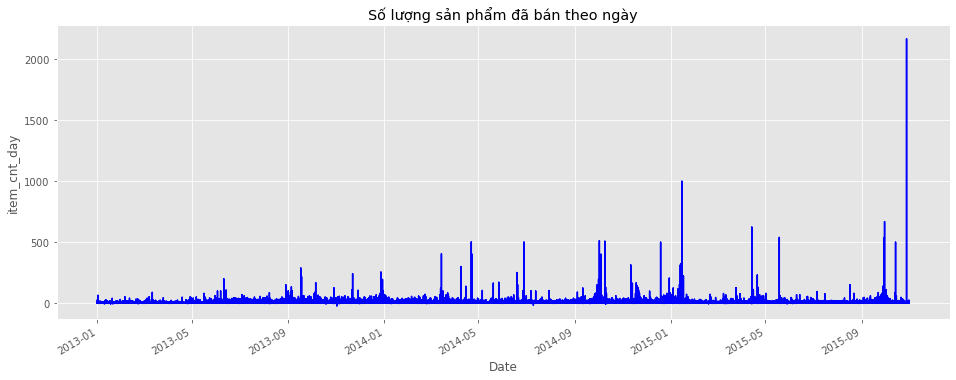

In [41]:
# sử dụng biểu đồ ggplot
plt.style.use('ggplot')
ax2 = df1['item_cnt_day'].plot(figsize=(16,6),color='blue')
# đặt tên title 
ax2.set_title('Số lượng sản phẩm đã bán theo ngày');
# xét trục x đặt tên là date
ax2.set_xlabel('Date')
# xét trục y là item_cnt_day
ax2.set_ylabel('item_cnt_day')
plt.show()

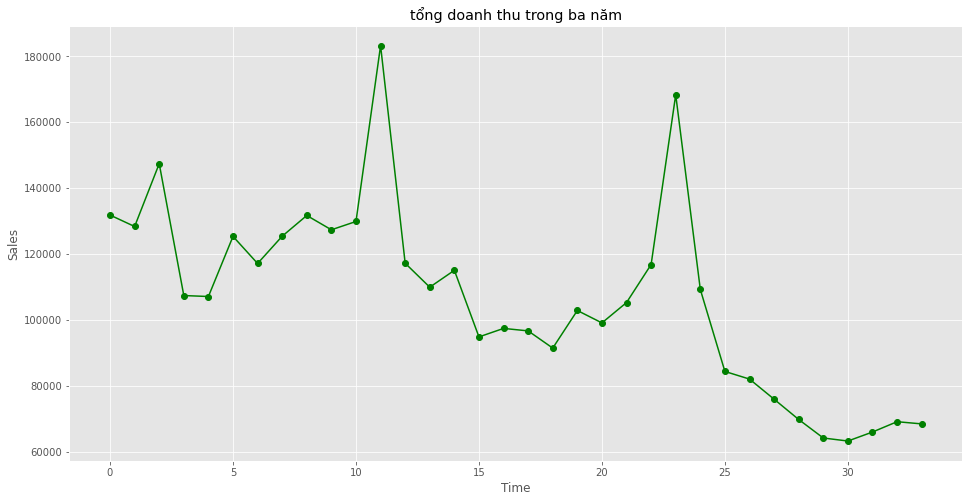

In [42]:
# biểu đồ tổng doanh thu trong ba năm
ts=df.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('tổng doanh thu trong ba năm')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid(True)
plt.plot(ts,'go-')
plt.show()

<h2> tien xu ly data cho bai toan  </h2>

In [43]:
# Nhóm dập dữ liệu theo hàng tháng 
monthly_df=df.groupby(["date_block_num","shop_id","item_id"])["date_block_num","date","item_price","item_cnt_day"].agg({"date_block_num":'mean',"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})
monthly_df.head()
# trong tập dữ liệu này sẽ nhóm tháng và shop bán sản phẩm đó trong khoảng ngày và giá trung bình, tổng số sản phẩm bán được trong ngày . 


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2476\189330718.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_df=df.groupby(["date_block_num","shop_id","item_id"])["date_block_num","date","item_price","item_cnt_day"].agg({"date_block_num":'mean',"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})


date_block_num       date             \
                                         mean        min        max   
date_block_num shop_id item_id                                        
0              0       32                 0.0 2013-01-03 2013-01-31   
                       33                 0.0 2013-01-03 2013-01-28   
                       35                 0.0 2013-01-31 2013-01-31   
                       43                 0.0 2013-01-31 2013-01-31   
                       51                 0.0 2013-01-13 2013-01-31   

                               item_price item_cnt_day  
                                     mean          sum  
date_block_num shop_id item_id                          
0              0       32           221.0          6.0  
                       33           347.0          3.0  
                       35           247.0          1.0  
                       43           221.0          1.0  
                       51           128.5          2.0

In [44]:
# từ tập trên ta rút ra tập dữ liệu với các tháng ,tên shop , tên sản phẩm và số sản phẩm bán ra 
sales_data_flat = monthly_df.item_cnt_day.apply(list).reset_index()
sales_data_flat

,date_block_num,shop_id,item_id,sum
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
1608213,33,59,22087,6.0
1608214,33,59,22088,2.0
1608215,33,59,22091,1.0
1608216,33,59,22100,1.0


<h3> Train anh test </h3>

<h2> Dự báo nhu cầu mua mặt hàng </h2>

<h3> read data </h3>

<h3> xử lý data </h3>

<h3> Train anh test </h3>

<h2> Tổng kết </h2>